# Step 1: Minimal Octo Inference Example

This Colab demonstrates how to load a pre-trained / finetuned Octo checkpoint, run inference on some offline images and compare the outputs to the true actions.

First, let's start with a minimal example!

In [1]:
# Download repo
!git clone https://github.com/octo-models/octo.git
%cd octo
# Install repo
!pip3 install -e .
!pip3 install -r requirements.txt
!pip3 install --upgrade "jax[cuda11_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install numpy==1.21.1 # to fix colab AttributeError: module 'numpy' has no attribute '_no_nep50_warning', if the error still shows reload

Cloning into 'octo'...
remote: Enumerating objects: 7157, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 7157 (delta 277), reused 283 (delta 257), pack-reused 6824
Receiving objects: 100% (7157/7157), 25.14 MiB | 29.25 MiB/s, done.
Resolving deltas: 100% (4607/4607), done.
/content/octo
Obtaining file:///content/octo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for octo (pyproject.toml) ... done
  Created wheel for octo: filename=octo-0.0.0-0.editable-py3-none-any.whl size=3224 sha256=0a454fed8b3bee03c50b1150444cbed6460b363cd5121d2add01f4d61c512810
  Stored in directory: /tmp/pip-ephem-wheel-cache-cm82mzn_/wheels/66/42/18/cf44976e18724f184efd64bbc31830460087187fa524fa6e42
Successfully built octo
  Cloning https://github.com/kvablack/dlim

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
   

In [2]:
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

270000/default/commit_success.txt:   0%|          | 0.00/109 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.32k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.63k [00:00<?, ?B/s]

270000/commit_success.txt:   0%|          | 0.00/101 [00:00<?, ?B/s]

dataset_statistics.json:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/547M [00:00<?, ?B/s]

example_batch.msgpack:   0%|          | 0.00/738k [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [70]:
# print(model.dataset_statistics["bridge_dataset"]['action']['mean'])
print(model.dataset_statistics["berkeley_autolab_ur5"]['action']['mean'])

[ 0.00055528  0.0011994  -0.00050623  0.00023048  0.00018547  0.00127582
  0.        ]


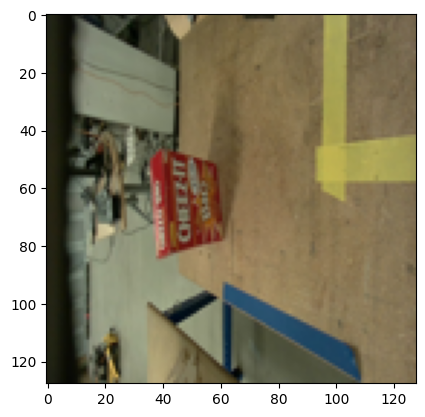

In [81]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# download one example BridgeV2 image
# IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
IMAGE_URL = "https://raw.githubusercontent.com/correlllab/MAGPIE/non-prehensile-manipulation/data/color_image_40.png"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((128, 128)))
plt.imshow(img)


In [82]:
# create obs & task dict, run inference
import jax

# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
# print(img.shape) # (1, 1, 128, 128, 3)
observation = {"image_wrist": img, "pad_mask": np.array([[True]])}
task = model.create_tasks(texts=["pick up the red box"])
action = model.sample_actions(observation, task, rng=jax.random.PRNGKey(0))
print(action.shape)
print(action)   # [batch, action_chunk, action_dim]

(1, 4, 7)
[[[ 8.9140677e-01  8.7685949e-01  7.4363309e-01  8.1115383e-01
    4.4375739e-01 -7.5031660e-02 -5.5795175e-04]
  [ 1.2302748e+00  6.9347095e-01  1.7250614e-01  4.9909434e-01
    4.4647133e-01 -1.6514479e-01 -1.1105236e-02]
  [ 1.3270720e+00  4.2977199e-01 -1.1213803e+00 -1.6029505e+00
    7.3947352e-01 -4.1280174e-01  4.6338304e-03]
  [ 6.5976286e-01 -8.2299054e-02 -1.1090870e+00 -9.7276694e-01
    6.2628128e-02  3.6832070e-01 -1.5470288e-02]]]


# Step 2: Run Inference on Full Trajectories

That was easy! Now let's try to run inference across a whole trajectory and visualize the results!

In [86]:
!pip install rlds dm-reverb mediapy
# import os
# os.environ['JAX_PLATFORMS'] = 'cpu' # Force on CPU

import cv2
import jax
import tensorflow as tf
import tensorflow_datasets as tfds
import tqdm
import rlds
import mediapy as media
from PIL import Image
from IPython import display

## Load Model Checkpoint
First, we will load the pre-trained checkpoint using the `load_pretrained()` function. You can simply feed the path to a checkpoint directory or the HuggingFace path of your Octo model of choice.

Below, we are loading directly from HuggingFace.


In [87]:
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-base")

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

300000/commit_success.txt:   0%|          | 0.00/100 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

300000/default/commit_success.txt:   0%|          | 0.00/108 [00:00<?, ?B/s]

dataset_statistics.json:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.32k [00:00<?, ?B/s]

example_batch.msgpack:   0%|          | 0.00/738k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/810M [00:00<?, ?B/s]

## Load Datasets
Next, we will load a trajectory from the bridge dataset for testing the model. We will use the publicly available copy in the Open X-Embodiment dataset bucket.

In [88]:
# create RLDS dataset builder
builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/bridge/0.1.0/')
ds = builder.as_dataset(split='train[:1]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
steps = list(episode['steps'])
print(steps[0])
images = [cv2.resize(np.array(step['observation']['image']), (256, 256)) for step in steps]

# extract goal image & language instruction
goal_image = images[-1]
language_instruction = steps[0]['observation']['natural_language_instruction'].numpy().decode()

# visualize episode
print(f'Instruction: {language_instruction}')
media.show_video(images, fps=10)
# plt.imshow(goal_image)

{'action': {'open_gripper': <tf.Tensor: shape=(), dtype=bool, numpy=True>, 'rotation_delta': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 6.077167e-07, -1.193009e-07,  1.308389e-07], dtype=float32)>, 'terminate_episode': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, 'world_vector': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9514002e-10, 8.0674190e-11, 2.9859176e-10], dtype=float32)>}, 'is_first': <tf.Tensor: shape=(), dtype=bool, numpy=True>, 'is_last': <tf.Tensor: shape=(), dtype=bool, numpy=False>, 'is_terminal': <tf.Tensor: shape=(), dtype=bool, numpy=False>, 'observation': {'image': <tf.Tensor: shape=(480, 640, 3), dtype=uint8, numpy=
array([[[ 83,  88,  91],
        [ 92,  97, 100],
        [ 95, 100, 103],
        ...,
        [ 12,  16,  19],
        [ 11,  15,  18],
        [ 11,  15,  18]],

       [[ 99, 104, 107],
        [112, 117, 120],
        [ 77,  82,  85],
        ...,
        [ 12,  16,  19],
        [ 12,  16,  19],
        [ 11,  15,  18]],

 

## Run Inference

Next, we will run inference over the images in the episode using the loaded model.
Below we demonstrate setups for both goal-conditioned and language-conditioned training.
Note that we need to feed inputs of the correct temporal window size.

In [89]:
WINDOW_SIZE = 2

# create `task` dict
task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=[language_instruction])                # for language conditioned

In [91]:
# run inference loop, this model only uses single image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []
for step in tqdm.tqdm(range(0, len(images) - WINDOW_SIZE + 1)):
    input_images = np.stack(images[step : step + WINDOW_SIZE])[None]
    observation = {
        'image_primary': input_images,
        'pad_mask': np.array([[True, True]]),
    }

    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    norm_actions = model.sample_actions(observation, task, rng=jax.random.PRNGKey(0))
    norm_actions = norm_actions[0]   # remove batch
    actions = (
        # ["berkeley_autolab_ur5"]
        norm_actions * model.dataset_statistics["bridge_dataset"]['action']['std']
        + model.dataset_statistics["bridge_dataset"]['action']['mean']
    )

    pred_actions.append(actions)
    true_actions.append(np.concatenate(
        (
            steps[step+1]['action']['world_vector'],
            steps[step+1]['action']['rotation_delta'],
            np.array(steps[step+1]['action']['open_gripper']).astype(np.float32)[None]
        ), axis=-1
    ))

100%|██████████| 37/37 [01:40<00:00,  2.72s/it]


## Visualize predictions and ground-truth actions

Finally, we will visualize the predicted actions in comparison to the groundtruth actions.

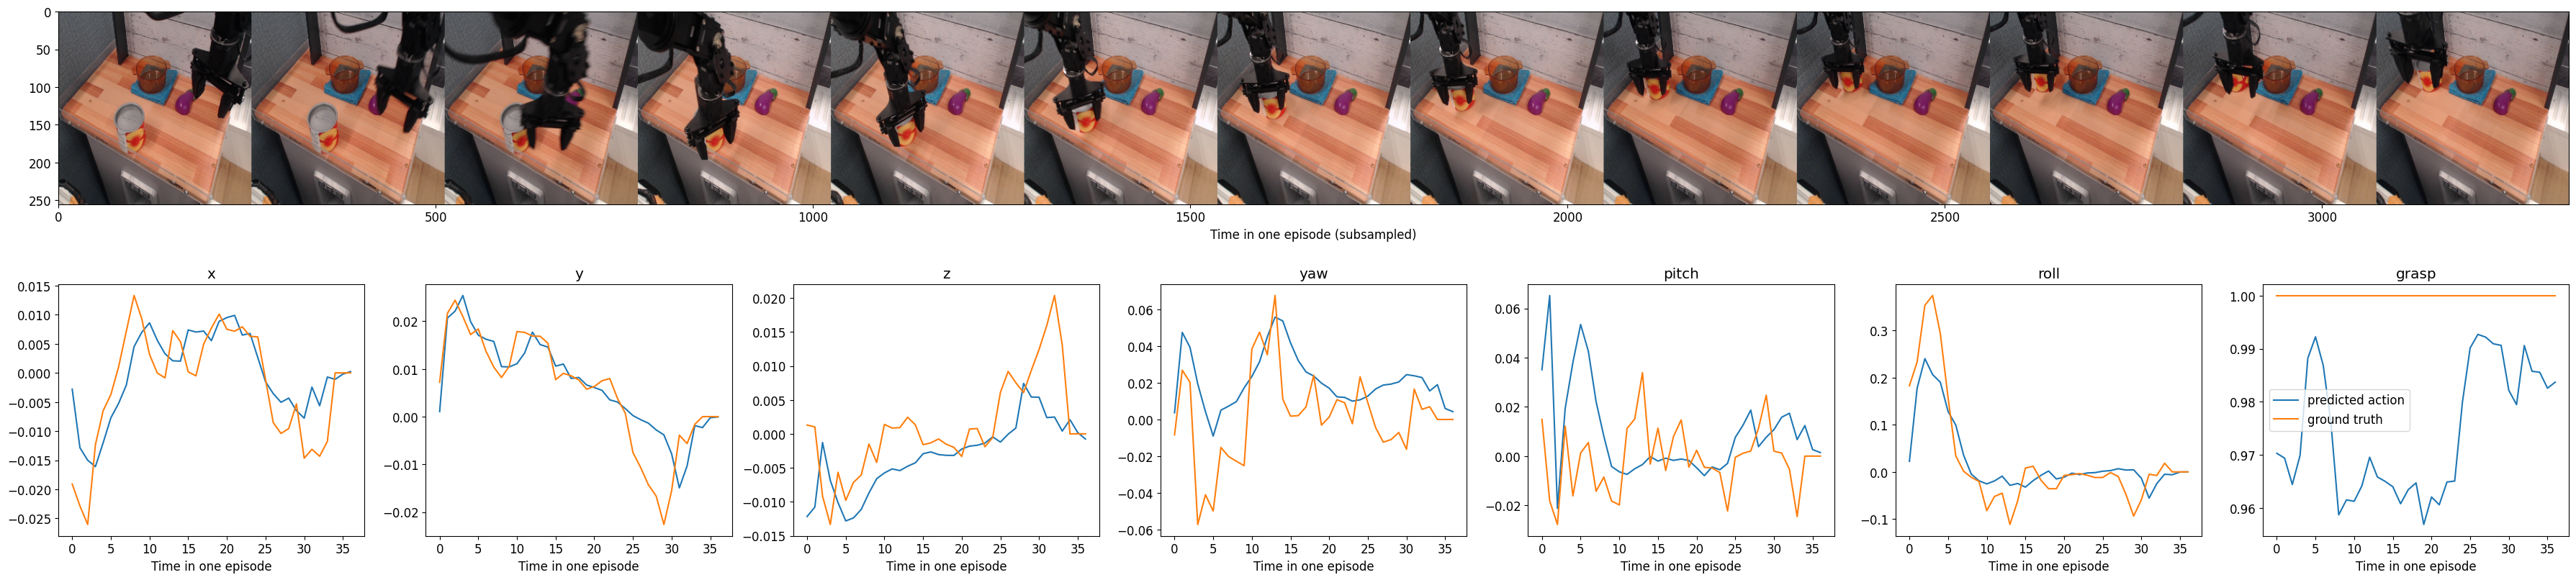

In [92]:
import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()